In [8]:

expt_path='C:\\_Data\\Coherence\\Tuning_2024_06_18\\'
cfg_file = 'coherence2405_play.yml'

#expt_path='C:\\_Data\\LLqub2\\Tuning_2024_05_12\\'
#cfg_file = 'autocalibration_cfg.yml'


# %matplotlib widget
%matplotlib inline

%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt

from qick import *
from qick.helpers import gauss
from tqdm import tqdm_notebook as tqdm

import os
import sys
import json
import cProfile

from scipy.fft import fft, fftfreq

from slab.instruments.instrumentmanager import InstrumentManager
#from slab.instruments.instrumenttypes import Instrument
from slab.experiment import Experiment
from slab.datamanagement import SlabFile
from slab import get_next_filename, AttrDict
import experiments as meas
import autocalib_config as cfg

import config

# Figure params
plt.rcParams['figure.figsize'] = [8,4]
plt.rcParams.update({'font.size': 13})


print('Data will be stored in', expt_path)

import importlib 
importlib.reload(meas)

# Results config file:
cfg_path = os.getcwd() + '\\' + cfg_file
#print('Results config will be', cfg_path)
#cfg_path = expt_path + cfg_file
cfg_file = cfg_path 
auto_cfg = config.load(cfg_path)

auto_cfg

# Connect to instruments 
im = InstrumentManager(ns_address='192.168.137.1') # BF5

soc = QickConfig(im[auto_cfg['aliases']['soc']].get_cfg())
print(soc)
print(auto_cfg['aliases']['soc'])
print(soc.description())

num_qubits = 4

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Data will be stored in C:\_Data\Coherence\Tuning_2024_06_18\
imported experiments.clifford_averager_program
imported fitting
imported experiments.qram_protocol_timestepped
imported experiments.single_qubit.acstarkshift_spectroscopy
imported experiments.single_qubit.amplitude_rabi
imported experiments.single_qubit.crud
imported experiments.single_qubit.DONOTUSE_ramsey_ef
imported experiments.single_qubit.DONOTUSE_randbench
imported experiments.single_qubit.length_rabi
imported experiments.single_qubit.pulse_probe_ef_spectroscopy
imported experiments.single_qubit.pulse_probe_spectroscopy
imported experiments.single_qubit.pulse_probe_spectroscopy_test
imported experiments.single_qubit.rb_ziqian
imported experiments.single_qubit.resonator_spectroscopy
imported experiments.single_qubit.rfsoc_tof_calibration
imported experiments.single_qubit.SingleRB
imported experiments.single_qubit.single_shot
imported 

215 307
readout freq 0 +/- 4167.5712


  0%|          | 0/1000 [00:00<?, ?it/s]

Saving C:\_Data\Coherence\Tuning_2024_06_18\00023_adc_trig_offset_calibration_qubit0.h5


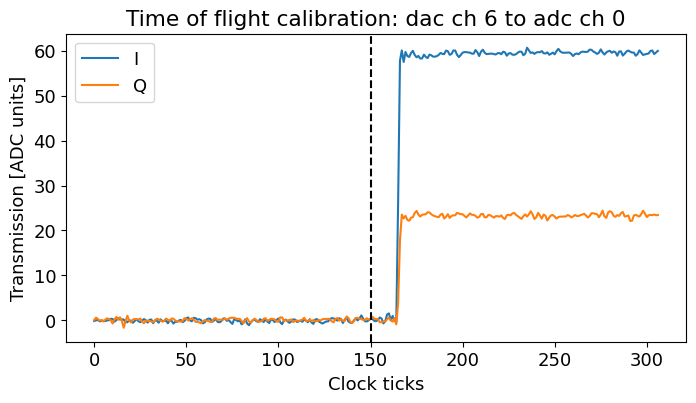

In [14]:
i = 0
tof = cfg.make_tof(soc, expt_path, cfg_path, i, im=im, go=True)